***
***

# ***RETAIL SALES FORECASTING USING MACHINE LEARNING***

***
***

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

***

##  Data Description

* This Data is multi-source operational data taken from 898 stores across
18 major chinese cities during 3 month observation period from March to June 2024. It captures 863 perishable products from these stores.

* This analysis is to get the information of actual demand of fresh products required in the store which helps to keep the stock available according to the real demand of the products.



***Data Dictionary***

* city_id ----> about city where sale occurs(encoded)

* store_id ----> location of store that made the sale(encoded)

* management_group_id ----> the higher level organization or management group of that store(encoded)

* first_category_id ---> highest level of product categorization(encoded)

* second_category_id ----> mid level of product categorization(encoded)

* third_category_id ----> most specific product category(encoded)

* product_id ----> the exact item or product which is sold(encoded)

* dt ----> 	date of purchasing

* sale_amount ----> The daily sales amount  # target column

* hours_sale ----> hours during which sales occured 

* stock_hour6_22_cnt ----> The number of out-of-stock hours between 6:00 and 22:00

* hours_stock_status ----> The hourly out-of-stock status

* discount ----> The discount rate (1.0 means no discount, 0.9 means 10% off)

* holiday_flag ---> Holiday indicator indicates  any holiday or not available on that day/location.

* activity_flag ----> Activity indicator indicates any special marketing actvity or not on that day/location

* precpt ----> The total precipitation recoded any natural calamity occur on that day/location

* avg_temperature ----> The average temperature recorded for that day/location

* avg_humidity ---> The average humidity recorded for that day/location

* avg_wind_level ----> The average wind force recorded for that day/location


***
***

## Loading Dataset

In [3]:
from datasets import load_dataset

# This pulls data from HF via API under the hood
dataset = load_dataset("Dingdong-Inc/FreshRetailNet-50K")




In [4]:
train_ds = dataset["train"]
eval_ds = dataset["eval"]

# See one row
print(train_ds[0])

data = train_ds.to_pandas()
print(data.head())

{'city_id': 0, 'store_id': 0, 'management_group_id': 0, 'first_category_id': 5, 'second_category_id': 6, 'third_category_id': 65, 'product_id': 38, 'dt': '2024-03-28', 'sale_amount': 0.1, 'hours_sale': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'stock_hour6_22_cnt': 0, 'hours_stock_status': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'discount': 1.0, 'holiday_flag': 0, 'activity_flag': 0, 'precpt': 1.6999, 'avg_temperature': 15.48, 'avg_humidity': 73.54, 'avg_wind_level': 1.97}
   city_id  store_id  management_group_id  first_category_id  \
0        0         0                    0                  5   
1        0         0                    0                  5   
2        0         0                    0                  5   
3        0         0                    0                  5   
4        0         0                    0                  5   

   second_category_id  

In [5]:
data.head()

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,1.6999,15.48,73.54,1.97
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,3.0190,15.08,76.56,1.71
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1,0,2.0942,15.91,76.47,1.73
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",1.0,1,0,1.5618,16.13,77.40,1.76
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",8,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1.0,0,0,3.5386,15.37,78.26,1.25


In [6]:
# Top 2 rows from the data
data.sample(5)

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
676137,0,182,6,21,64,123,259,2024-05-24,0.7,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0,0,0.5712,23.49,72.71,1.52
1049389,0,242,6,4,28,10,88,2024-06-15,0.5,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1,0,7.1516,26.24,77.84,1.77
1219721,0,300,5,16,26,96,345,2024-05-08,0.8,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, ...",0,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.866,0,1,0.8365,21.83,64.49,1.88
1751820,0,552,6,20,50,59,567,2024-05-27,1.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.2, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.781,0,1,2.0783,22.55,66.45,1.86
2563769,3,800,6,20,68,127,177,2024-04-26,0.3,"[0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,0,0,0.0000,19.96,36.00,1.71


In [7]:
# data.nunique() fails because some columns contain list/array objects (unhashable).
# Convert list/ndarray values to tuples before counting unique values.

def _make_hashable(v):
	# numpy is already imported in the notebook
	if isinstance(v, (list, np.ndarray)):
		return tuple(v)
	return v

nunique = data.apply(lambda col: col.map(_make_hashable).nunique())
nunique

city_id                     18
store_id                   898
management_group_id          7
first_category_id           32
second_category_id          84
third_category_id          233
product_id                 865
dt                          90
sale_amount               1363
hours_sale             2176334
stock_hour6_22_cnt          17
hours_stock_status       12764
discount                  2600
holiday_flag                 2
activity_flag                2
precpt                   40117
avg_temperature           1582
avg_humidity              4817
avg_wind_level             247
dtype: int64

In [8]:
# Bottom 2 rows from the data
data.tail(2)

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
4499998,17,897,6,24,69,139,82,2024-06-24,0.6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.909,0,1,8.6647,26.58,81.62,1.50
4499999,17,897,6,24,69,139,82,2024-06-25,0.6,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.909,0,1,8.9142,27.59,84.59,1.86


In [9]:
# Rows and Columns in the data
print('Total number of rows in data : ' , data.shape[0])
print('Total number of columns in data : ', data.shape[1])



Total number of rows in data :  4500000
Total number of columns in data :  19


***
***

## Exploratory Data Analysis(EDA)

#### Basic Information

In [10]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500000 entries, 0 to 4499999
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   city_id              int64  
 1   store_id             int64  
 2   management_group_id  int64  
 3   first_category_id    int64  
 4   second_category_id   int64  
 5   third_category_id    int64  
 6   product_id           int64  
 7   dt                   object 
 8   sale_amount          float64
 9   hours_sale           object 
 10  stock_hour6_22_cnt   int32  
 11  hours_stock_status   object 
 12  discount             float64
 13  holiday_flag         int32  
 14  activity_flag        int32  
 15  precpt               float64
 16  avg_temperature      float64
 17  avg_humidity         float64
 18  avg_wind_level       float64
dtypes: float64(6), int32(3), int64(7), object(3)
memory usage: 600.8+ MB


***Inference***

* In this data there are some numerical columns and there are some categorical columns also there is one date column and few columns 
like hours_sales, hour_stock_status which is in array form also there is multiple unique columns like cityid,storeid,management_group_id,first_category_id,second_category_id,product_id .
* In this data our target column is sales_amount .
* Here we need to change the dtype of some columns like: for dt column our dtype would be datetime.

In [11]:
# Before changing dtypes we need to look min and max values of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
city_id,4500000.0,4.974420,6.096600,0.00,0.0000,0.0000,12.0000,17.000
store_id,4500000.0,409.080660,248.545647,0.00,195.0000,395.0000,598.0000,897.000
management_group_id,4500000.0,4.621640,1.962418,0.00,3.0000,6.0000,6.0000,6.000
first_category_id,4500000.0,15.213660,8.972127,0.00,5.0000,16.0000,21.0000,31.000
second_category_id,4500000.0,44.735080,22.338902,0.00,28.0000,38.0000,66.0000,83.000
third_category_id,4500000.0,116.362120,57.560365,0.00,77.0000,111.0000,167.0000,232.000
product_id,4500000.0,390.425980,263.469693,0.00,135.0000,363.0000,633.0000,864.000
sale_amount,4500000.0,0.998591,1.406738,0.00,0.4000,0.7000,1.1000,44.900
stock_hour6_22_cnt,4500000.0,3.180341,4.596586,0.00,0.0000,0.0000,6.0000,16.000
discount,4500000.0,0.911141,0.128173,0.00,0.8510,0.9890,1.0000,1.088


***Inference***
* In this data city id is in the range of 0 t 17 , management_group_id is in the range of 0 to 6 , first_category_id is in the range of 0 to 31 , second_category_id is in the range of 0 to 83 ,third_category_id is in the range of 0 to 232 ,holiday_flag is in 0 and 1 and activity_flag is in 0 and 1 . These are small and medium positive values so we change the dtype of these values into uint8 beacuse uint8 takes values from 0 to 255.
* while product_id is in the range of 0 to 864 and store_id is in the range of 0 to 897 has high values so we take this into uint16.
* In float dtype we can change the size of float from 64 to 32.


##### Converting dtype of Some Columns for Memory Efficiency

In [12]:
# Converting dtypes of all columns whose dtype is float
col = ['avg_wind_level','avg_temperature','avg_humidity','discount','sale_amount','precpt']

data[col] = data[col].astype('Float32')

In [13]:
# int object columns
col = ['holiday_flag','activity_flag','city_id','management_group_id','first_category_id','second_category_id','third_category_id']
data[col] = data[col].astype('uint8')

In [14]:
# int object columns
col = ['store_id','product_id']
data[col] = data[col].astype('uint16')

In [15]:
# Convert date column dtype into datetime format
data['dt'] = pd.to_datetime(data['dt'],format='%Y-%m-%d')
data['dt'] = data['dt'].dt.normalize()

In [16]:
data.head(2)

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,1.6999,15.48,73.540001,1.97
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,3.019,15.08,76.559998,1.71


In [17]:
# Now looking the info again

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500000 entries, 0 to 4499999
Data columns (total 19 columns):
 #   Column               Dtype         
---  ------               -----         
 0   city_id              uint8         
 1   store_id             uint16        
 2   management_group_id  uint8         
 3   first_category_id    uint8         
 4   second_category_id   uint8         
 5   third_category_id    uint8         
 6   product_id           uint16        
 7   dt                   datetime64[ns]
 8   sale_amount          Float32       
 9   hours_sale           object        
 10  stock_hour6_22_cnt   int32         
 11  hours_stock_status   object        
 12  discount             Float32       
 13  holiday_flag         uint8         
 14  activity_flag        uint8         
 15  precpt               Float32       
 16  avg_temperature      Float32       
 17  avg_humidity         Float32       
 18  avg_wind_level       Float32       
dtypes: Float32(6), dateti

***

#### Descriptive Statistics

In [18]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
city_id,4500000.0,4.97442,0.0,0.0,0.0,12.0,17.0,6.0966
store_id,4500000.0,409.08066,0.0,195.0,395.0,598.0,897.0,248.545647
management_group_id,4500000.0,4.62164,0.0,3.0,6.0,6.0,6.0,1.962418
first_category_id,4500000.0,15.21366,0.0,5.0,16.0,21.0,31.0,8.972127
second_category_id,4500000.0,44.73508,0.0,28.0,38.0,66.0,83.0,22.338902
third_category_id,4500000.0,116.36212,0.0,77.0,111.0,167.0,232.0,57.560365
product_id,4500000.0,390.42598,0.0,135.0,363.0,633.0,864.0,263.469693
dt,4500000,2024-05-11 11:59:59.999998976,2024-03-28 00:00:00,2024-04-19 00:00:00,2024-05-11 12:00:00,2024-06-03 00:00:00,2024-06-25 00:00:00,NaN
sale_amount,4500000.0,0.998591,0.0,0.4,0.7,1.1,44.900002,1.406738
stock_hour6_22_cnt,4500000.0,3.180341,0.0,0.0,0.0,6.0,16.0,4.596586


#### Checking for Missing Values

In [19]:
data.isnull().sum().sum()

np.int64(0)

***Inference***

* No missing values present in the data.

#### Separating Categorical and Numerical columns

In [20]:
# columns available in the data
data.columns


Index(['city_id', 'store_id', 'management_group_id', 'first_category_id',
       'second_category_id', 'third_category_id', 'product_id', 'dt',
       'sale_amount', 'hours_sale', 'stock_hour6_22_cnt', 'hours_stock_status',
       'discount', 'holiday_flag', 'activity_flag', 'precpt',
       'avg_temperature', 'avg_humidity', 'avg_wind_level'],
      dtype='object')

In [21]:
cat_cols = ['holiday_flag','activity_flag','city_id', 'store_id', 'management_group_id', 'first_category_id','second_category_id', 'third_category_id', 'product_id']
num_cols = ['sale_amount','stock_hour6_22_cnt','discount','precpt','avg_temperature', 'avg_humidity', 'avg_wind_level']

#### Looking for Duplicated Values in the data

In [22]:
#  hours_sale and hours_stock_status cols is iin array and have multiple duplicates we remove this 

col = ['hours_sale','hours_stock_status']

leave_col = [i for i in data.columns if i not in col]

duplicate_data = data.duplicated(subset= leave_col,keep=False )


In [23]:
data[duplicate_data]
# this shows no duplicate values present in the data 
# we don't need to treat it

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level


***

### DATA VISUALIZATION : 

### Correlation Heatmap for Numerical Columns

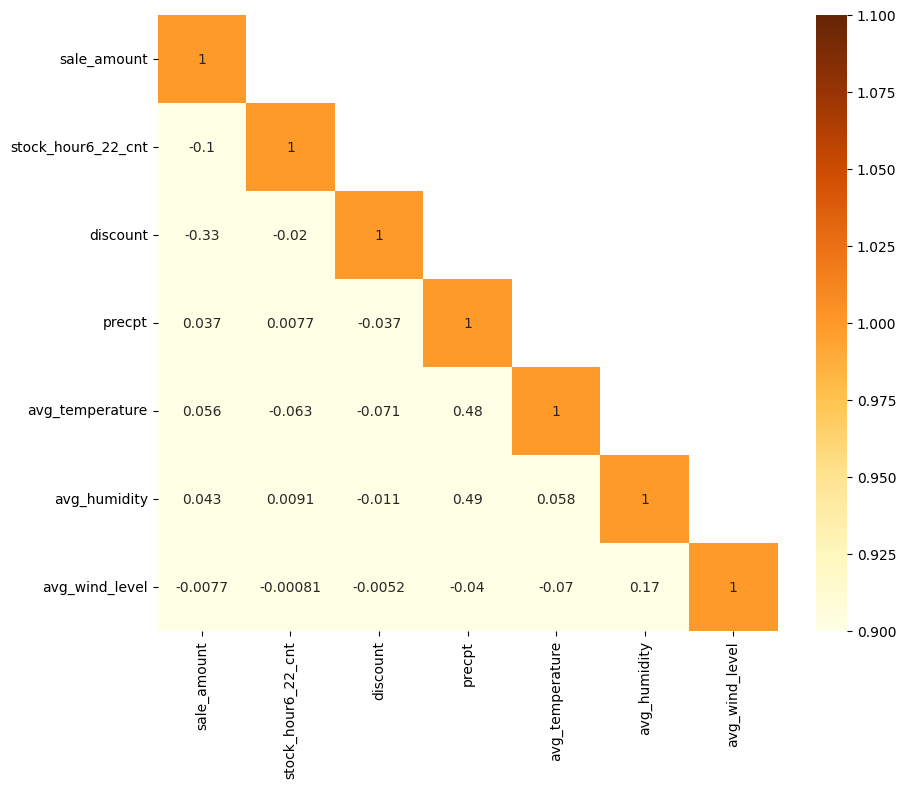

In [24]:
plt.figure(figsize=[10,8])
sns.heatmap(data[num_cols].corr(),annot=True,vmin=1,cmap='YlOrBr',mask = np.triu(data[num_cols].corr(),k=1))
plt.show()

***Inference***
* In this heatmap we can analyse that no two columns have any strong correlation
* In avg_humidity and avg_temperature is the only column which have moderative positive correlation
* In avg_humidity and precept column,avg_temperature and precpt column have weak positive correlation
* Rest all the columns have no correlation

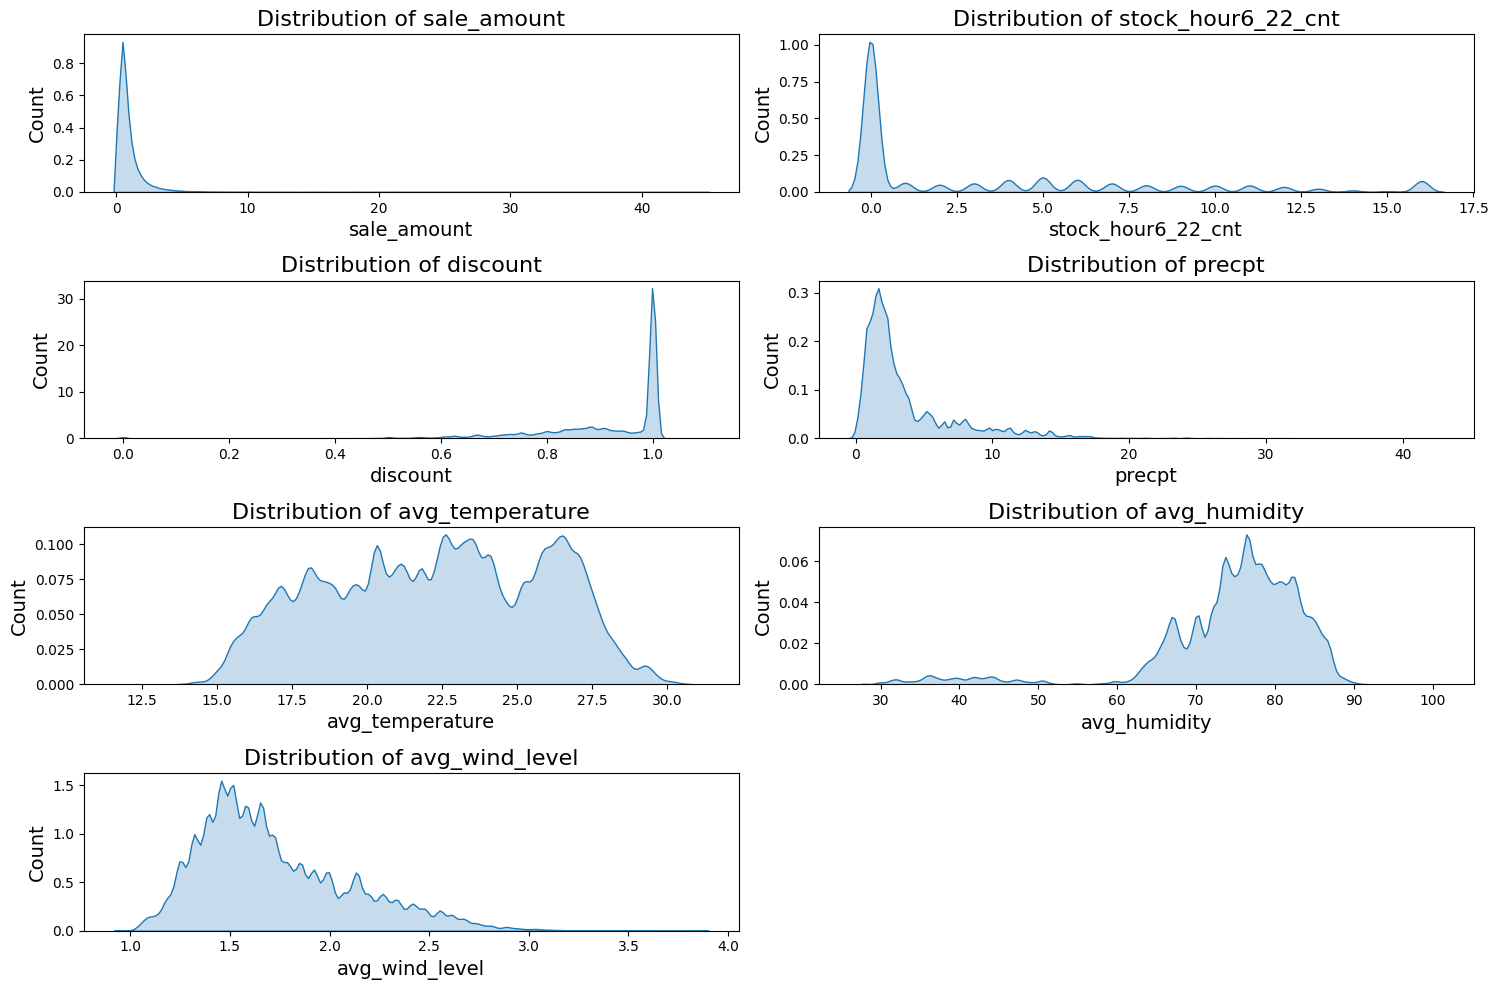

In [25]:
# UNIVARIATE ANALYSIS
plt.figure(figsize=(15,10))
t=1
for i in num_cols:
    plt.subplot(4,2,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Distribution of {i}',fontsize=16)
    plt.xlabel(i,fontsize=14)
    plt.ylabel('Count',fontsize=14)
    t+=1
plt.tight_layout()
plt.show()

### Scatter Plot

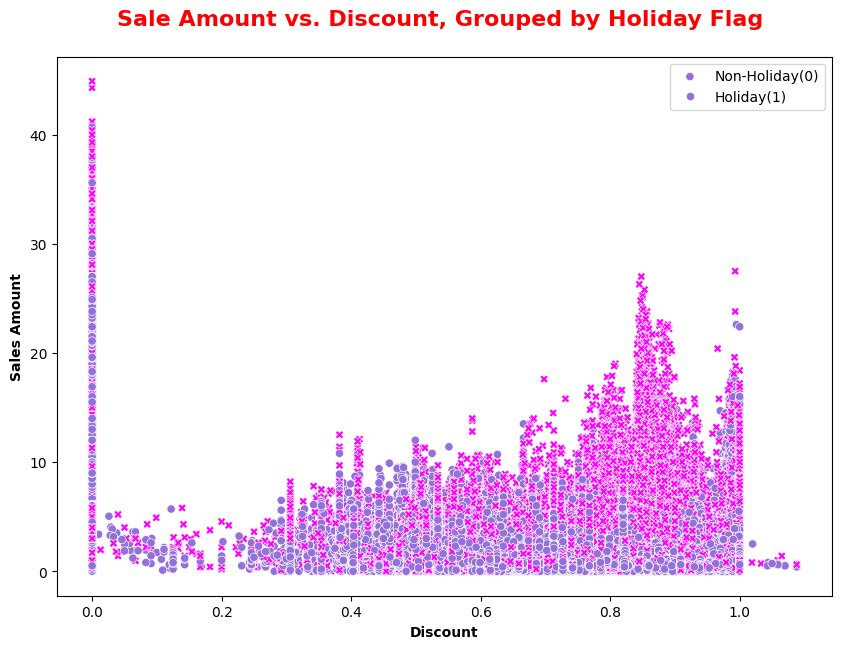

In [26]:
plt.figure(figsize=[10,7])
sns.scatterplot(data,x='discount',y='sale_amount',hue='holiday_flag',style= 'holiday_flag',palette=['mediumpurple','fuchsia'])
plt.title('Sale Amount vs. Discount, Grouped by Holiday Flag \n ',fontweight = 'bold',color='red',fontsize=16)
plt.legend(labels =['Non-Holiday(0)','Holiday(1)'])
plt.xlabel('Discount',fontweight='bold')
plt.ylabel('Sales Amount',fontweight = 'bold')
plt.show()

#### Pairplot

In [27]:
# # Ensure hue column is categorical to avoid ambiguous truth-value issues
# data['holiday_flag'] = data['holiday_flag'].astype('category')

# # Use a sample for pairplot (full dataset is very large and can trigger internal errors / be very slow)
# plot_data = data.sample(n=2000, random_state=42) if len(data) > 2000 else data

# sns.pairplot(data=plot_data, vars=num_cols, hue='holiday_flag', kind='scatter',palette="Spectral", diag_kind='kde', plot_kws={'alpha':0.6, 's':20})
# plt.suptitle('Pairwise Relationship of Key Metrics by Holiday Status', y=1.02)
# plt.show()

#### Line Chart

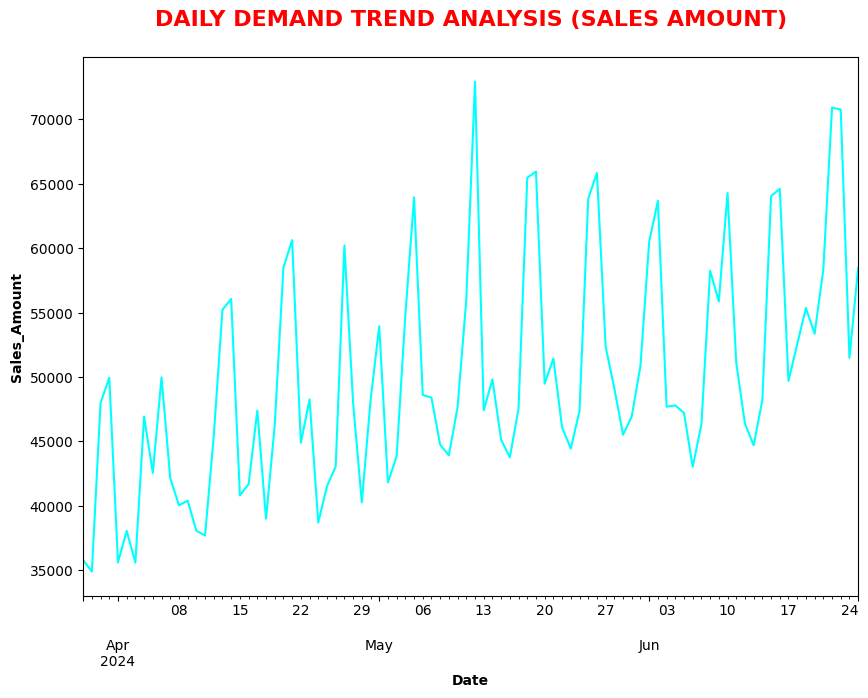

In [28]:
# Create Index of date 
df = data.set_index('dt')
daily_demand = df['sale_amount'].resample('D').sum() # adding values on the basis of date
plt.figure(figsize=[10,7])
plt.title('DAILY DEMAND TREND ANALYSIS (SALES AMOUNT)\n',fontweight = 'bold',fontsize=16,color='red')
daily_demand.plot(kind='line',color='cyan')
plt.xlabel('Date',fontweight='bold',fontsize=10)
plt.ylabel('Sales_Amount',fontweight='bold',fontsize=10)
plt.show()

#### Bar Plot

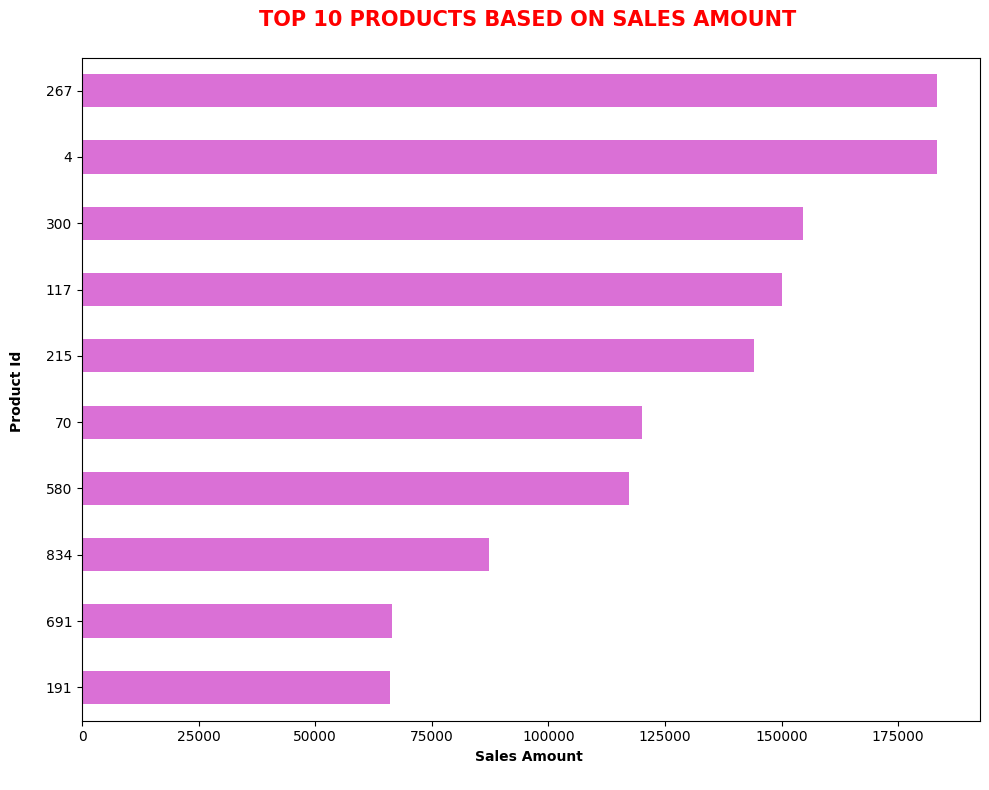

In [29]:
product_requirement = data.groupby(by='product_id')['sale_amount'].sum().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=[10,8])
plt.title('TOP 10 PRODUCTS BASED ON SALES AMOUNT \n',fontweight='bold',fontsize=15,color='red')
product_requirement.plot(kind='barh',color = 'orchid')
plt.xlabel('Sales Amount \n ',fontweight='bold',fontsize=10)
plt.ylabel('Product Id \n',fontweight='bold',fontsize=10)
plt.tight_layout()
plt.show()

***

In [30]:
# Feature Engineering
data.head()

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,stock_hour6_22_cnt,hours_stock_status,discount,holiday_flag,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,1.6999,15.48,73.540001,1.97
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,3.019,15.08,76.559998,1.71
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,1,0,2.0942,15.91,76.470001,1.73
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",11,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, ...",1.0,1,0,1.5618,16.129999,77.400002,1.76
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",8,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1.0,0,0,3.5386,15.37,78.260002,1.25


In [31]:
data["dt"] = pd.to_datetime(data["dt"])

data["day"] = data["dt"].dt.day
data["month"] = data["dt"].dt.month
data["year"] = data["dt"].dt.year
data["day_of_week"] = data["dt"].dt.dayofweek
data["is_weekend"] = data["day_of_week"].isin([5,6]).astype(int)

In [32]:
# made some columns from data date as it plays an important role in sales prediction.day of week, weekend,seasonality all can be
# guessed from these columns.

In [33]:
data.head()

,city_id,store_id,management_group_id,first_category_id,second_category_id,third_category_id,product_id,dt,sale_amount,hours_sale,...,activity_flag,precpt,avg_temperature,avg_humidity,avg_wind_level,day,month,year,day_of_week,is_weekend
0,0,0,0,5,6,65,38,2024-03-28,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, ...",...,0,1.6999,15.48,73.540001,1.97,28,3,2024,3,0
1,0,0,0,5,6,65,38,2024-03-29,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,0,3.019,15.08,76.559998,1.71,29,3,2024,4,0
2,0,0,0,5,6,65,38,2024-03-30,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,0,2.0942,15.91,76.470001,1.73,30,3,2024,5,1
3,0,0,0,5,6,65,38,2024-03-31,0.1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, ...",...,0,1.5618,16.129999,77.400002,1.76,31,3,2024,6,1
4,0,0,0,5,6,65,38,2024-04-01,0.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, ...",...,0,3.5386,15.37,78.260002,1.25,1,4,2024,0,0


In [34]:
holiday_sale=data.groupby("holiday_flag")["sale_amount"].sum().nlargest(10)
sale_prop_act=data.groupby("activity_flag")["sale_amount"].sum().nlargest(10)

<Axes: xlabel='holiday_flag'>

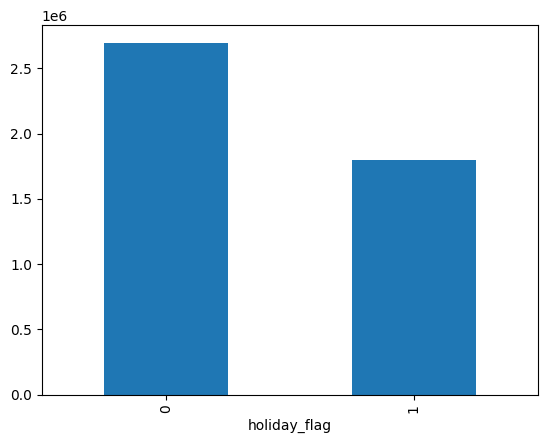

In [35]:
holiday_sale.plot(kind='bar')

<Axes: xlabel='activity_flag'>

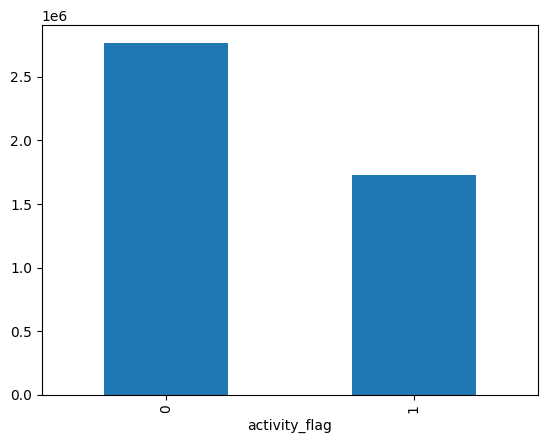

In [36]:
sale_prop_act.plot(kind='bar')

In [37]:
data["stock_availability_ratio"] = data["stock_hour6_22_cnt"] / 17
data['discounted_price'] = data['sale_amount'] / (1 - data['discount']/100)